In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [78]:
def data_preprocessing(train_path, test_path):
    
    data_train = pd.read_csv(train_path, sep='\t')
    data_test = pd.read_csv(test_path, sep='\t')
    
    column_list = np.intersect1d(data_train.columns, data_test.columns)
    data_train = data_train[column_list]
    data_test = data_test[column_list]

    y_train = data_train['TD1_status']
    X_train = data_train.drop(['TD1_status', 'file'], axis=1)

    y_test = data_test['TD1_status']
    X_test = data_test.drop(['TD1_status', 'file'], axis=1)
    
    return([X_train, y_train, X_test, y_test, column_list])

In [79]:
def model_evaluation(grid_search, X_train, y_train, X_test, y_test):
    # Use the best found parameters to make predictions
    best_model = grid_search.best_estimator_

    # Training predictions
    y_train_pred = best_model.predict(X_train)
    # Test predictions
    y_test_pred = best_model.predict(X_test)

    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    print(f'Training Accuracy: {train_accuracy}')
    print(f'Training F1 Score: {train_f1}')

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print(f'Test Accuracy: {test_accuracy}')
    print(f'Test F1 Score: {test_f1}')

    # score = roc_auc_score(y_test, y_test_pred_prob[:, 1])
    
#     fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred_prob[:, 1])

#     plt.figure(figsize=(4, 4))
#     plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %score)
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
#     plt.title('ROC curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.grid()
#     plt.legend()
#     plt.show()

# TCRnet feature selection

In [21]:
X_train, y_train, X_test, y_test, colnames = data_preprocessing('feature_tables_by_VJ_comb/feature_table_train_TCRnet_selection_30k_normalization_batch2_rosati.tsv',
                                                      'feature_tables_by_VJ_comb/feature_table_test_TCRnet_selection_30k_normalization_batch2_rosati.tsv')

In [22]:
print(X_train.shape)
print(X_test.shape)

(280, 646)
(205, 646)


In [23]:
# Define the model
model = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algorithms to use
    'max_iter': [150, 200, 300]  # Maximum number of iterations
}

# Set up GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 1, 'max_iter': 150, 'solver': 'newton-cg'}


Training Accuracy: 0.9535714285714286
Training F1 Score: 0.9725158562367865
Test Accuracy: 0.7414634146341463
Test F1 Score: 0.8454810495626822


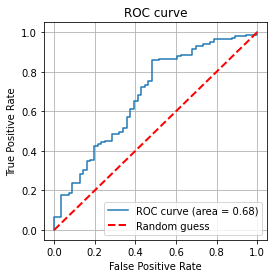

In [24]:
model_evaluation(grid_search, X_train, y_train, X_test, y_test)

# F-test feature selection

In [80]:
X_train, y_train, X_test, y_test, colnames = data_preprocessing('feature_tables_by_VJ_comb/feature_table_train_fisher_selection_30k_normalization_batch2_rosati.tsv',
                                                      'feature_tables_by_VJ_comb/feature_table_test_fisher_selection_30k_normalization_batch2_rosati.tsv')

In [81]:
print(X_train.shape)
print(X_test.shape)

(296, 533)
(206, 533)


## LogisticRegression

In [82]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


param_grid = {
    'penalty' : ['elasticnet'],
    'l1_ratio' : [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['saga'],  # Algorithms to use
    'max_iter': [1500]  # Maximum number of iterations
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Set up GridSearchCV
grid_search2 = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

# Fit the model
grid_search2.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search2.best_params_}')

/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linea

Best Parameters: {'C': 1, 'l1_ratio': 0, 'max_iter': 1500, 'penalty': 'elasticnet', 'solver': 'saga'}


In [83]:
# Print the best parameters
print(f'Best Parameters: {grid_search2.best_params_}')

Best Parameters: {'C': 1, 'l1_ratio': 0, 'max_iter': 1500, 'penalty': 'elasticnet', 'solver': 'saga'}


In [84]:
model_evaluation(grid_search2, X_train, y_train, X_test, y_test)

Training Accuracy: 0.777027027027027
Training F1 Score: 0.8745247148288973
Test Accuracy: 0.7233009708737864
Test F1 Score: 0.83943661971831


In [103]:
# Define the model
model = LogisticRegression()
#my_estimator = make_pipeline(StandardScaler(), model)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algorithms to use
    'max_iter': [150, 200, 300]  # Maximum number of iterations
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'C': 1, 'max_iter': 150, 'solver': 'liblinear'}


In [86]:
model_evaluation(grid_search, X_train, y_train, X_test, y_test)

Training Accuracy: 1.0
Training F1 Score: 1.0
Test Accuracy: 0.8300970873786407
Test F1 Score: 0.8902821316614421


In [104]:
y_test_pred_prob1 = best_model.predict_proba(X_test)[:, 1]

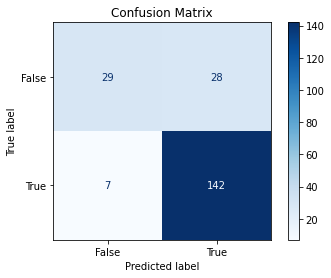

In [87]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Посчитаем confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Нарисуем красиво
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

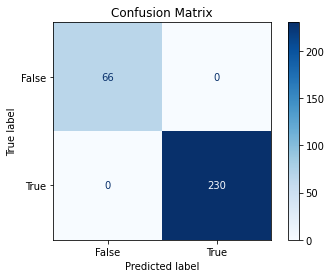

In [88]:
y_train_pred = best_model.predict(X_train)

# Посчитаем confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Нарисуем красиво
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## DecisionTreeClassifier

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

Train Accuracy: 0.777027027027027
Train F1 Score: 0.8745247148288973
Test Accuracy: 0.7233009708737864
Test F1 Score: 0.83943661971831

Classification Report on Test:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        57
        True       0.72      1.00      0.84       149

    accuracy                           0.72       206
   macro avg       0.36      0.50      0.42       206
weighted avg       0.52      0.72      0.61       206



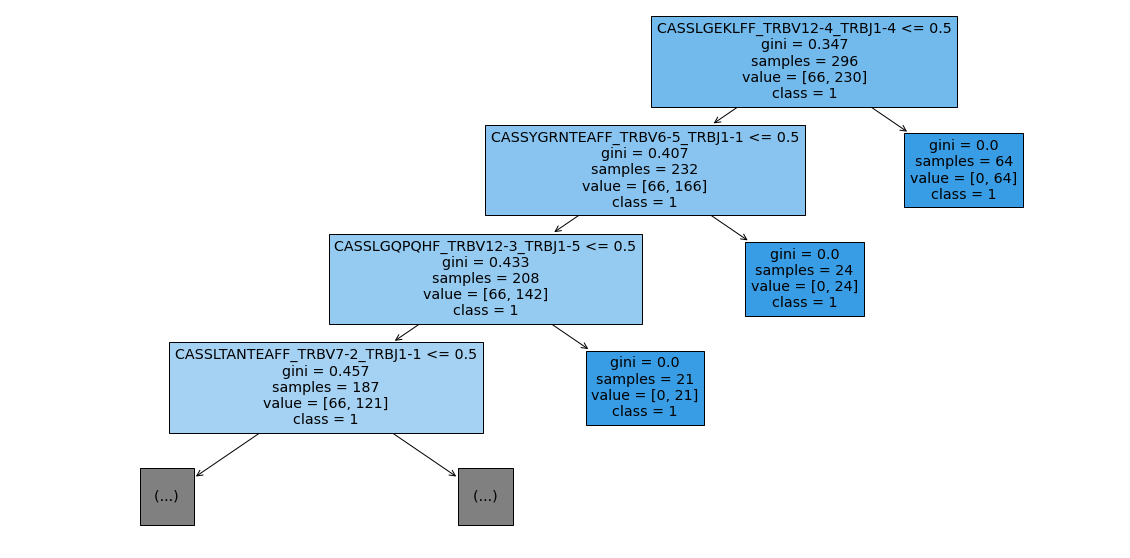

In [90]:
# Инициализируем модель дерева решений
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Обучаем дерево
tree_model.fit(X_train, y_train)

# Предсказания
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Метрики на обучении
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))

# Метрики на тесте
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

# Краткий отчет
print("\nClassification Report on Test:")
print(classification_report(y_test, y_test_pred))

# Визуализация дерева
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['0', '1'], filled=True, max_depth=3)
plt.show()

In [91]:
feature_importance = pd.Series(tree_model.feature_importances_, index=colnames[:-2])
print(feature_importance.sort_values(ascending=False).head(10))

CASSLGETQYF_TRBV12-4_TRBJ2-5         0.299361
CSARGNTEAFF_TRBV20-1_TRBJ1-1         0.195687
CASSLGQPQHF_TRBV28_TRBJ1-5           0.173424
CASSLTDTQYF_TRBV12-4_TRBJ2-3         0.171772
CASSYSGLAGVYNEQFF_TRBV6-6_TRBJ2-1    0.159755
CASSPGDYGYTF_TRBV12-3_TRBJ1-2        0.000000
CASSPGGETQYF_TRBV7-2_TRBJ2-5         0.000000
CASSPDTGELFF_TRBV5-1_TRBJ2-2         0.000000
CASSLVSYEQYF_TRBV5-1_TRBJ2-7         0.000000
CASSPDSYEQYF_TRBV7-9_TRBJ2-7         0.000000
dtype: float64


In [92]:
from sklearn.metrics import roc_auc_score, roc_curve

# Получаем вероятности принадлежности к классу 1
y_test_pred_prob2 = tree_model.predict_proba(X_test)[:, 1]

# # Вычисляем AUC
# roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# print(f'ROC AUC Score: {roc_auc:.4f}')

# Строим ROC-кривую
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)

# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Decision Tree')
# plt.legend()
# plt.grid()
# plt.show()

## Random forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Задаем сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Инициализируем RandomForest
rf = RandomForestClassifier(random_state=42)

# GridSearch по F1-метрике
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Лучшая модель
best_rf = grid_search_rf.best_estimator_
print("Лучшие параметры Random Forest:", grid_search_rf.best_params_)

# Предсказания
y_test_pred = best_rf.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_test_pred))

# ROC AUC
y_test_pred_prob3 = best_rf.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# print(f'ROC AUC Score: {roc_auc:.4f}')

# # ROC кривая
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Random Forest')
# plt.legend()
# plt.grid()
# plt.show()

Лучшие параметры Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test F1 Score: 0.9113924050632912


In [94]:
importances = pd.Series(best_rf.feature_importances_, index=colnames[:-2])
print("Топ-10 важных признаков:\n", importances.sort_values(ascending=False).head(10))

Топ-10 важных признаков:
 CASSLGETQYF_TRBV12-4_TRBJ2-5       0.034974
CASSLEETQYF_TRBV5-1_TRBJ2-5        0.017393
CASSLGYEQYF_TRBV12-4_TRBJ2-7       0.014285
CASSDSSGSTDTQYF_TRBV6-4_TRBJ2-3    0.013298
CASSVGGNTEAFF_TRBV9_TRBJ1-1        0.012691
CASSFGETQYF_TRBV12-4_TRBJ2-5       0.012096
CASSLGETQYF_TRBV7-6_TRBJ2-5        0.010799
CASSLGYEQYF_TRBV5-1_TRBJ2-7        0.010102
CASSLEGTEAFF_TRBV5-1_TRBJ1-1       0.009825
CASSDRDTGELFF_TRBV6-4_TRBJ2-2      0.009169
dtype: float64


# XGBoost

In [95]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [96]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb

# Проверка баланса классов
print("Class balance:\n", y.value_counts())

# Параметры для XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Инициализация XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# GridSearch для XGBoost
cv = 5
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=cv, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Лучшая модель
best_xgb = grid_search_xgb.best_estimator_
print("Лучшие параметры XGBoost:", grid_search_xgb.best_params_)

# Предсказания
y_test_pred = best_xgb.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_test_pred))

# ROC AUC
y_test_pred_prob4 = best_xgb.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# print(f'ROC AUC Score: {roc_auc:.4f}')

# ROC кривая
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - XGBoost')
# plt.legend()
# plt.grid()
# plt.show()

Class balance:
 TD1_status
True     379
False    123
Name: count, dtype: int64


/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/vvladykina/.local/lib/python3.8/site-packages/sklearn/linea

Лучшие параметры XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Test F1 Score: 0.8947368421052632


ValueError: Length of values (533) does not match length of index (535)

In [97]:
# Важность признаков
importances = pd.Series(best_xgb.feature_importances_, index=X_test.columns)
print("Топ-10 важных признаков:\n", importances.sort_values(ascending=False).head(10))

Топ-10 важных признаков:
 CASSLDADTQYF_TRBV5-1_TRBJ2-3     0.043984
CASSLTDTQYF_TRBV28_TRBJ2-3       0.026199
CSARDSSYEQYF_TRBV20-1_TRBJ2-7    0.024937
CATSDSYNEQFF_TRBV24-1_TRBJ2-1    0.020936
CASSSANYGYTF_TRBV12-4_TRBJ1-2    0.020577
CASSLVPDTQYF_TRBV5-1_TRBJ2-3     0.020149
CASSLGETQYF_TRBV12-4_TRBJ2-5     0.019806
CASSFSTDTQYF_TRBV12-4_TRBJ2-3    0.019573
CATSRGETQYF_TRBV15_TRBJ2-5       0.017375
CSVEDNYGYTF_TRBV29-1_TRBJ1-2     0.016421
dtype: float32


In [ ]:
np.int8(y_test)

## Support Vector Machines (SVM)¶

In [ ]:
X_test.shape

In [ ]:
y_test_pred_prob5.shape

In [ ]:
y_test.shape

In [98]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Инициализация SVM
svm_model = SVC(probability=True, random_state=42)

# Сетка гиперпараметров
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearch
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Лучшая модель
best_svm = grid_search_svm.best_estimator_
print("Лучшие параметры SVM:", grid_search_svm.best_params_)

# Предсказания
y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

# ROC AUC
y_test_pred_prob5 = best_svm.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# print(f'ROC AUC Score: {roc_auc:.4f}')

# # ROC кривая
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
# plt.figure(figsize=(6, 6))
# plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - SVM')
# plt.legend()
# plt.grid()
# plt.show()

Лучшие параметры SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Train F1 Score: 1.0
Test F1 Score: 0.9


In [99]:

def plot_CV_ROC(y_true, y_pred_proba, model_name, title=None, color=None, plot_baseline=True, lw=2.5, ax=None):
    """
    Plots the ROC curve for a binary classification model.

    Parameters:
    -----------
    y_true : array-like
        True binary labels (0 or 1).
    y_pred_proba : array-like
        Predicted probabilities for the positive class (1).
    model_name : str, optional
        Name of the model (for legend). Default: "Model".
    figsize : tuple, optional
        Figure size (width, height). Default: (8, 6).
    """
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    if ax is None:
        _, ax = plt.subplots(figsize=(6,6), dpi=150)

    ax.plot(fpr, tpr, color=color, lw=lw, alpha=1., 
             label=f'{model_name} (AUC = {roc_auc:.3f})')
    
    if plot_baseline:
        ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Baseline', alpha=.7)
    
    # Customize plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(title)
    ax.legend(loc="lower right")
    ax.grid(True, alpha=0.3)

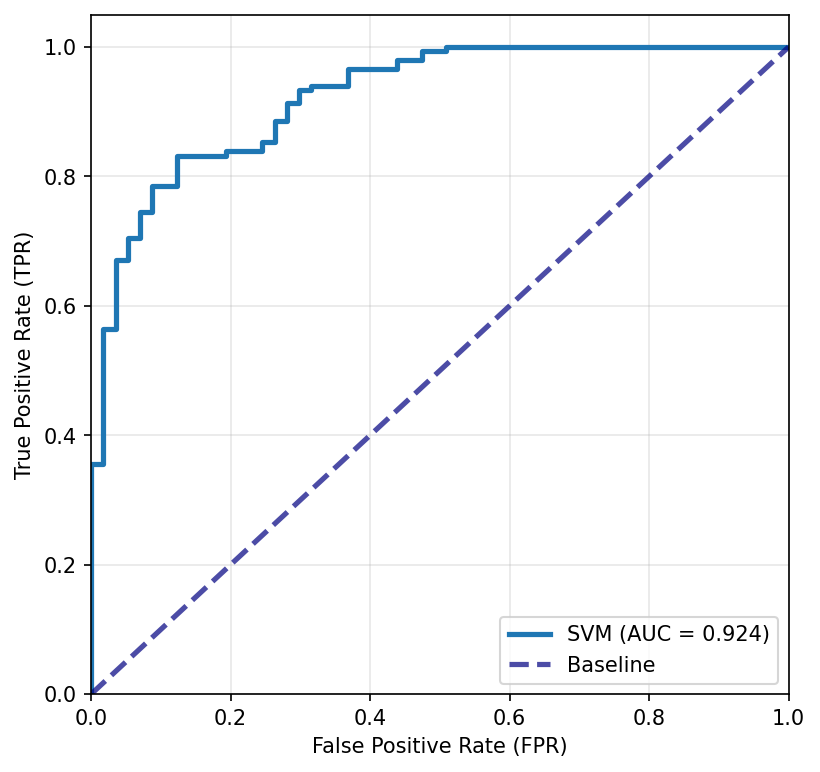

In [100]:
plot_CV_ROC(y_test, y_test_pred_prob5, model_name='SVM')

In [116]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [117]:

def plot_CV_PR(y_true, y_pred_proba, model_name, title=None, color=None, plot_baseline=True, lw=2.5, ax=None):
    """
    Plots the precision-recall curve and computes PRAUC.
    
    Parameters:
    -----------
    y_true : array-like
        True binary labels (0 or 1)
    y_scores : array-like
        Target scores (probability estimates of the positive class)
    title : str, optional
        Title for the plot (default: 'Precision-Recall Curve')
    
    Returns:
    --------
    prauc : float
        Precision-Recall Area Under Curve (PRAUC)
    fig : matplotlib.figure.Figure
        The figure object containing the plot
    """
    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    
    # Compute PRAUC (average precision score)
    prauc = average_precision_score(y_true, y_pred_proba)
    
    # Create plot
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6), dpi=150)
    
    # Plot the precision-recall curve
    ax.step(recall, precision, where='post', color=color, alpha=1.,
            label=f'{model_name} (AUC = {prauc:.3f})', lw=lw)
    
    # Add baseline for random classifier
    if plot_baseline:
        positive_ratio = np.mean(y_true)
        ax.axhline(y=positive_ratio, color='navy', linestyle='--', 
                label=f'Random (AP = {positive_ratio:.3f})')
    
    # Set plot properties
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.45, 1.05])
    ax.set_xlabel('Recall (Sensitivity)')
    ax.set_ylabel('Precision')
    ax.set_title(title)
    ax.legend(loc='lower right')
    ax.grid(True)
    
    plt.tight_layout()
    
    return ax

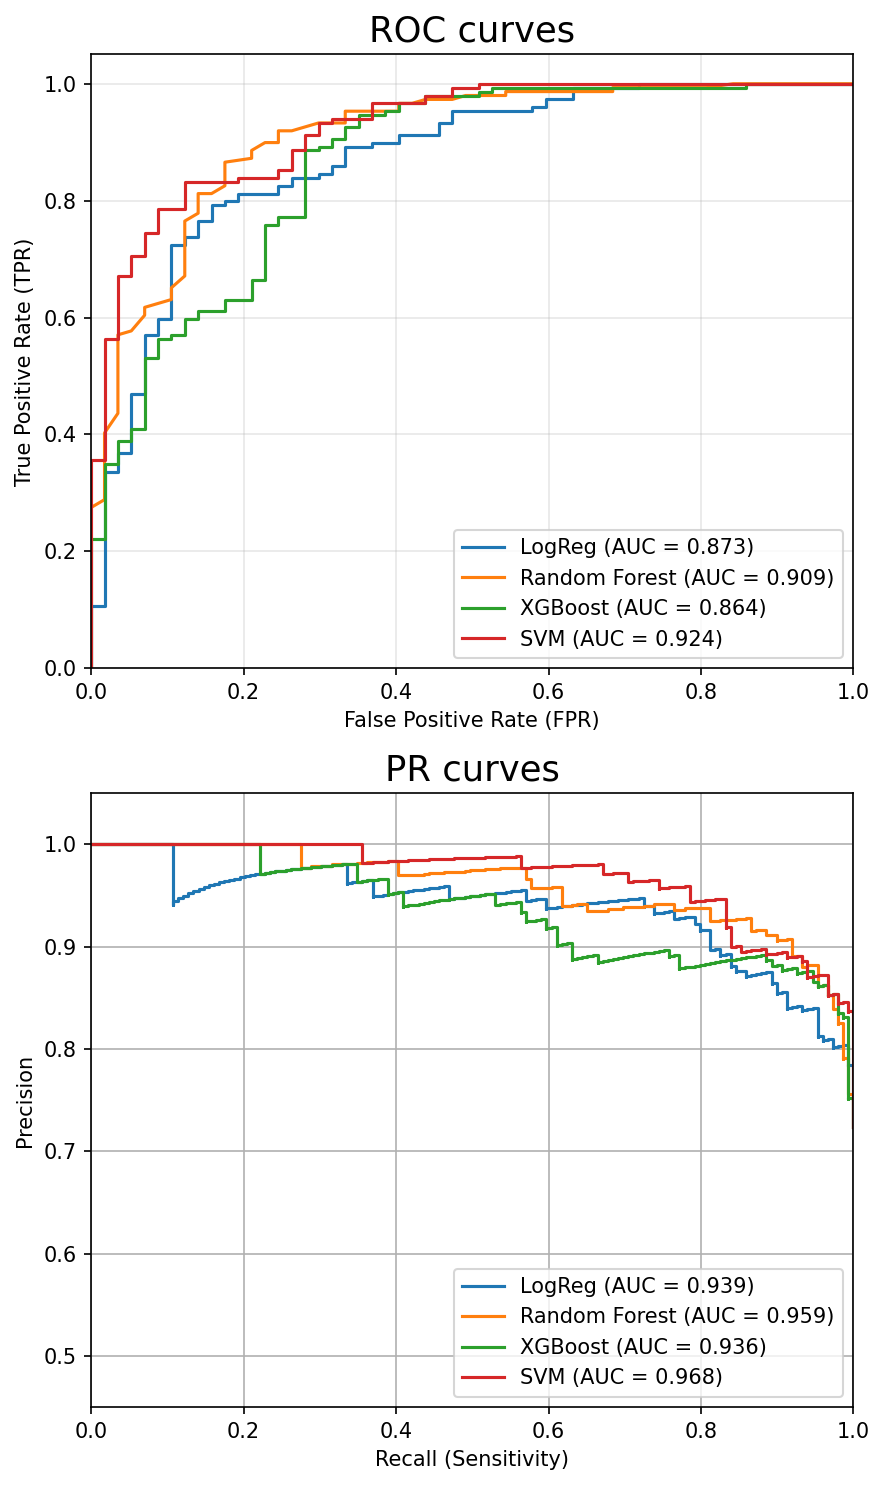

In [125]:
 _, ax = plt.subplots(2, 1, figsize=(6, 10), dpi=150)

model_names = ["LogReg", "Random Forest", "XGBoost", "SVM"]
models = [y_test_pred_prob1, y_test_pred_prob3, y_test_pred_prob4, y_test_pred_prob5]
for name, model_prob in zip(model_names, models):
    plot_CV_ROC(y_test, model_prob, model_name=name, ax=ax[0], lw=1.5,plot_baseline=False)
    plot_CV_PR(y_test, model_prob, model_name=name, ax=ax[1], lw=1.5, plot_baseline=False)
    
    ax[0].set_title("ROC curves", fontsize=17)
    ax[1].set_title("PR curves", fontsize=17)
plt.tight_layout()

In [ ]:
len(y_test)

In [ ]:
len(model_prob)

In [ ]:
 _, ax = plt.subplots(figsize=(6, 6), dpi=150)

model_names = ["LogReg", "Decision Tree", "Random Forest", "XGBoost", "SVM"]
models = [y_test_pred_prob1, y_test_pred_prob2, y_test_pred_prob3, y_test_pred_prob4, y_test_pred_prob5]
for name, model_prob in zip(model_names, models):
    plot_CV_ROC(y_test, model_prob, model_name=name, ax=ax, plot_baseline=False)